In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.utils import pie_plot


In [2]:
df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')

## Basic overview

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
df.loc[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_range


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            object  
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrig  float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
 11  amount_range    category
dtypes: category(1), float64(5), int64(3), object(3)
memory usage: 540.0+ MB


In [69]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [70]:
df.describe(include = ['O'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1530544995,C1286084959
freq,2237500,3,113


## Vizualization of features

### Relationship between target and prediction 

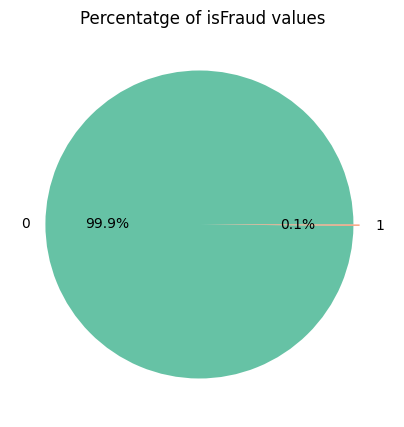

In [9]:
pie_plot(df['isFraud'])

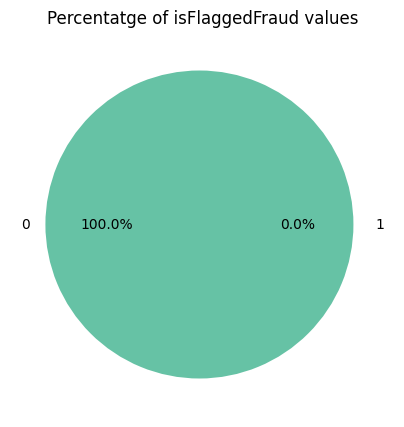

In [10]:
pie_plot(df['isFlaggedFraud'])

In [51]:
print('Amount of labelled and unlabelled as Fraud transactions:')
df['isFlaggedFraud'].value_counts()

Amount of labelled and unlabelled as Fraud transactions


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

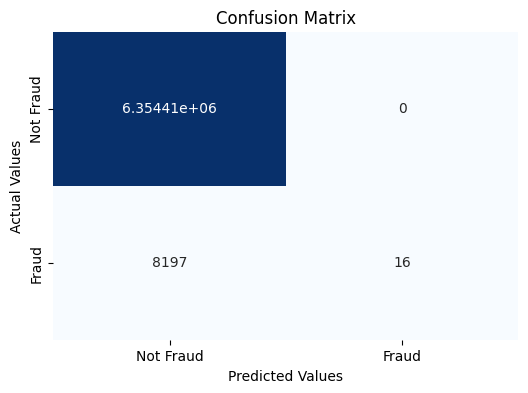

In [12]:
conf_matrix = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.show()

In this scenario, the dataset exhibits a significant class imbalance, requiring careful handling.

Two critical aspects need consideration:

- False Positives: These occur when legitimate customers attempt transactions, yet the model incorrectly flags them as fraudulent. This may lead to customer dissatisfaction and potential loss of the customer.

- False Negatives: This category includes instances where fraudulent transactions are processed as legitimate by the model. Failing to identify such cases could result in financial losses for the customer or the merchant.

All transactions labelled as fraud were actually fraudulent

In [13]:
fraud_not_flagged = df.loc[(df.isFlaggedFraud == 0) & (df.isFraud ==1)]
fraud_not_flagged.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


Observations:

Most fraud transactions but not labelled as such have emptied the accounts. That makes me wonder if they would know the balance beforehand. 

### Numerical features

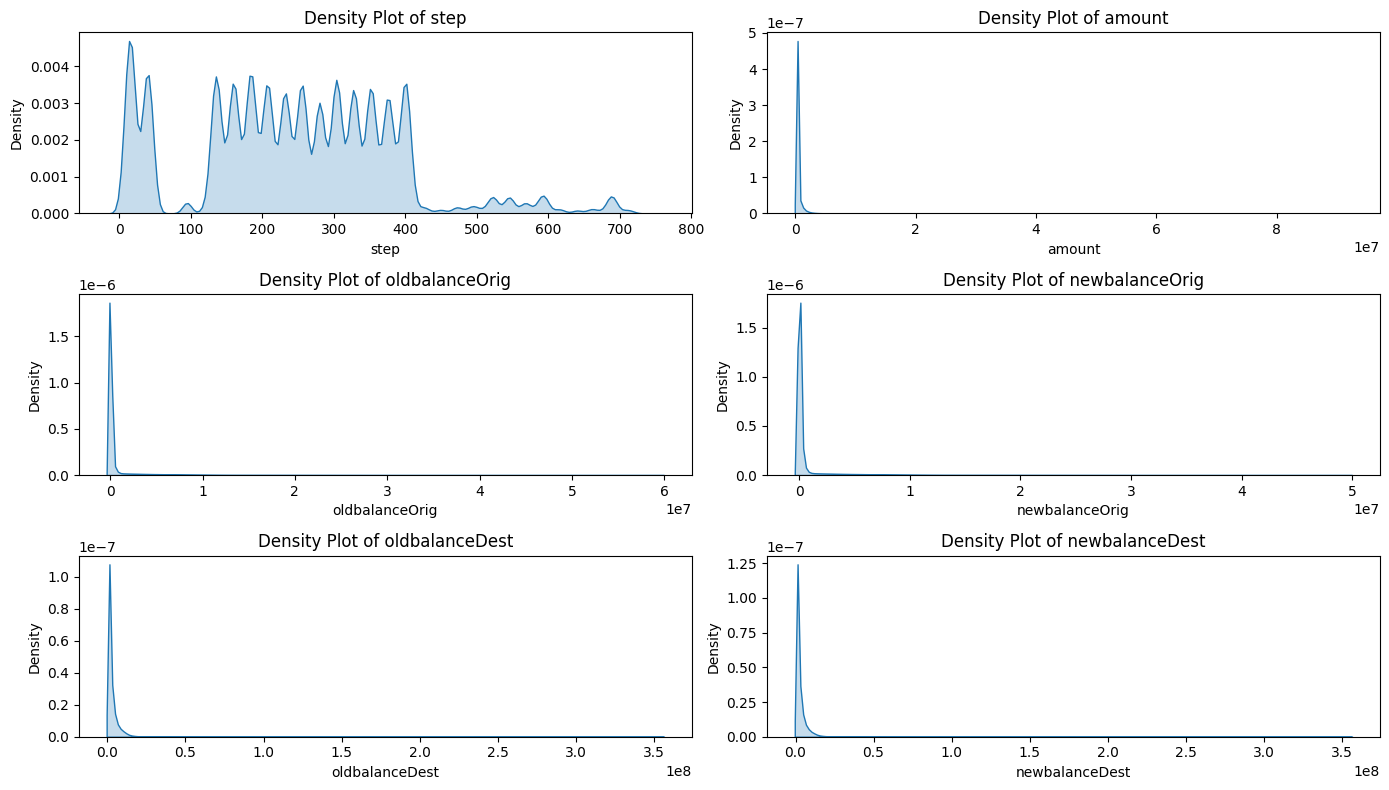

In [14]:
numeric_cols =['step', 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,8))
axes = axes.flatten()  

for ax, col in zip(axes, numeric_cols):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'Density Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [15]:
skew_vals = df[numeric_cols].skew().reset_index()
skew_vals.columns = ['Feature', 'Skewness']


print("Skewness of numerical values")
print(skew_vals)

Skewness of numerical values
          Feature   Skewness
0            step   0.375177
1          amount  30.993949
2  oldbalanceOrig   5.249136
3  newbalanceOrig   5.176884
4  oldbalanceDest  19.921758
5  newbalanceDest  19.352302


Observations:

The columns 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest' have most of the values slighty above 0. 

The column 'step' has  two ranges that look interesting and will be checked later more accurately.

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


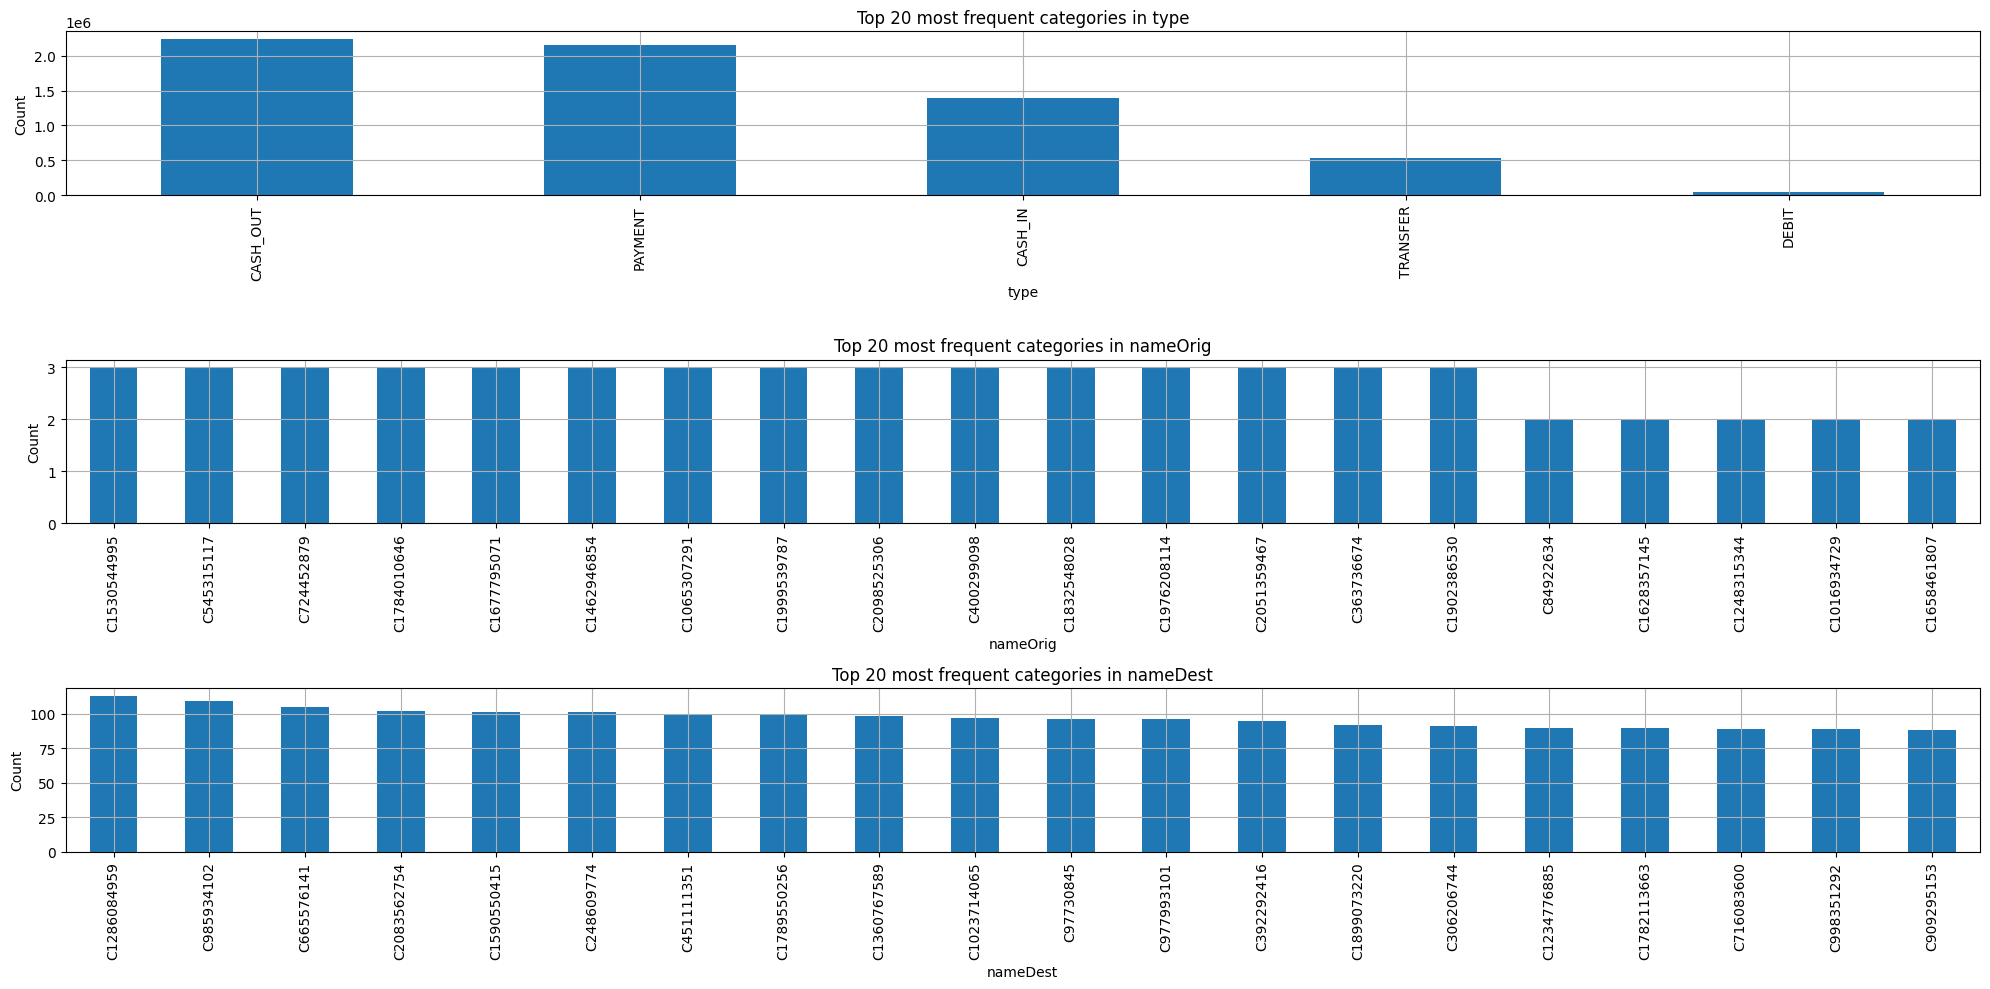

In [16]:
%time
categorical_cols = ['type', 'nameOrig', 'nameDest']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

for ax, col in zip(axs, categorical_cols):
    top_categories = df[col].value_counts().nlargest(20)
    
    top_categories.plot(kind='bar', ax=ax)
    
    ax.set_title(f'Top 20 most frequent categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

Observations:

- Most frequent types are cash-out and payments
- Both nameOrig and nameDest have repeated values that will be studied later.

### Correlation

The column to factorize is type, the number or unique values is : 5
The column to factorize is nameOrig, the number or unique values is : 6353307
The column to factorize is nameDest, the number or unique values is : 2722362


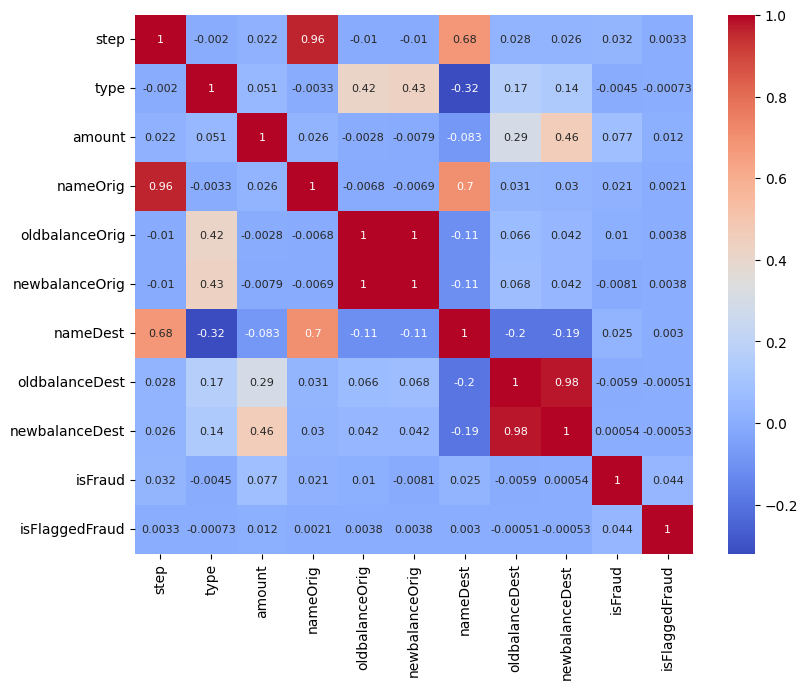

In [17]:
corr_df = df.copy()

for col in corr_df.columns:
    if corr_df[col].dtype == 'object':
        corr_df[col] = pd.factorize(corr_df[col])[0]
        print(f'The column to factorize is {col}, the number or unique values is : {corr_df[col].nunique()}')

corr = corr_df.corr(method = 'pearson')
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()


Observations: 

- Step - nameOrig = 0.96
- NewBalanceOrig - OldBalanceOrig = 1
- NewBalanceDest - OlbalanceDest = 0.98

There is high multicollinearity between these features. This issue will be managed later.


## Visualization of variables

### Step

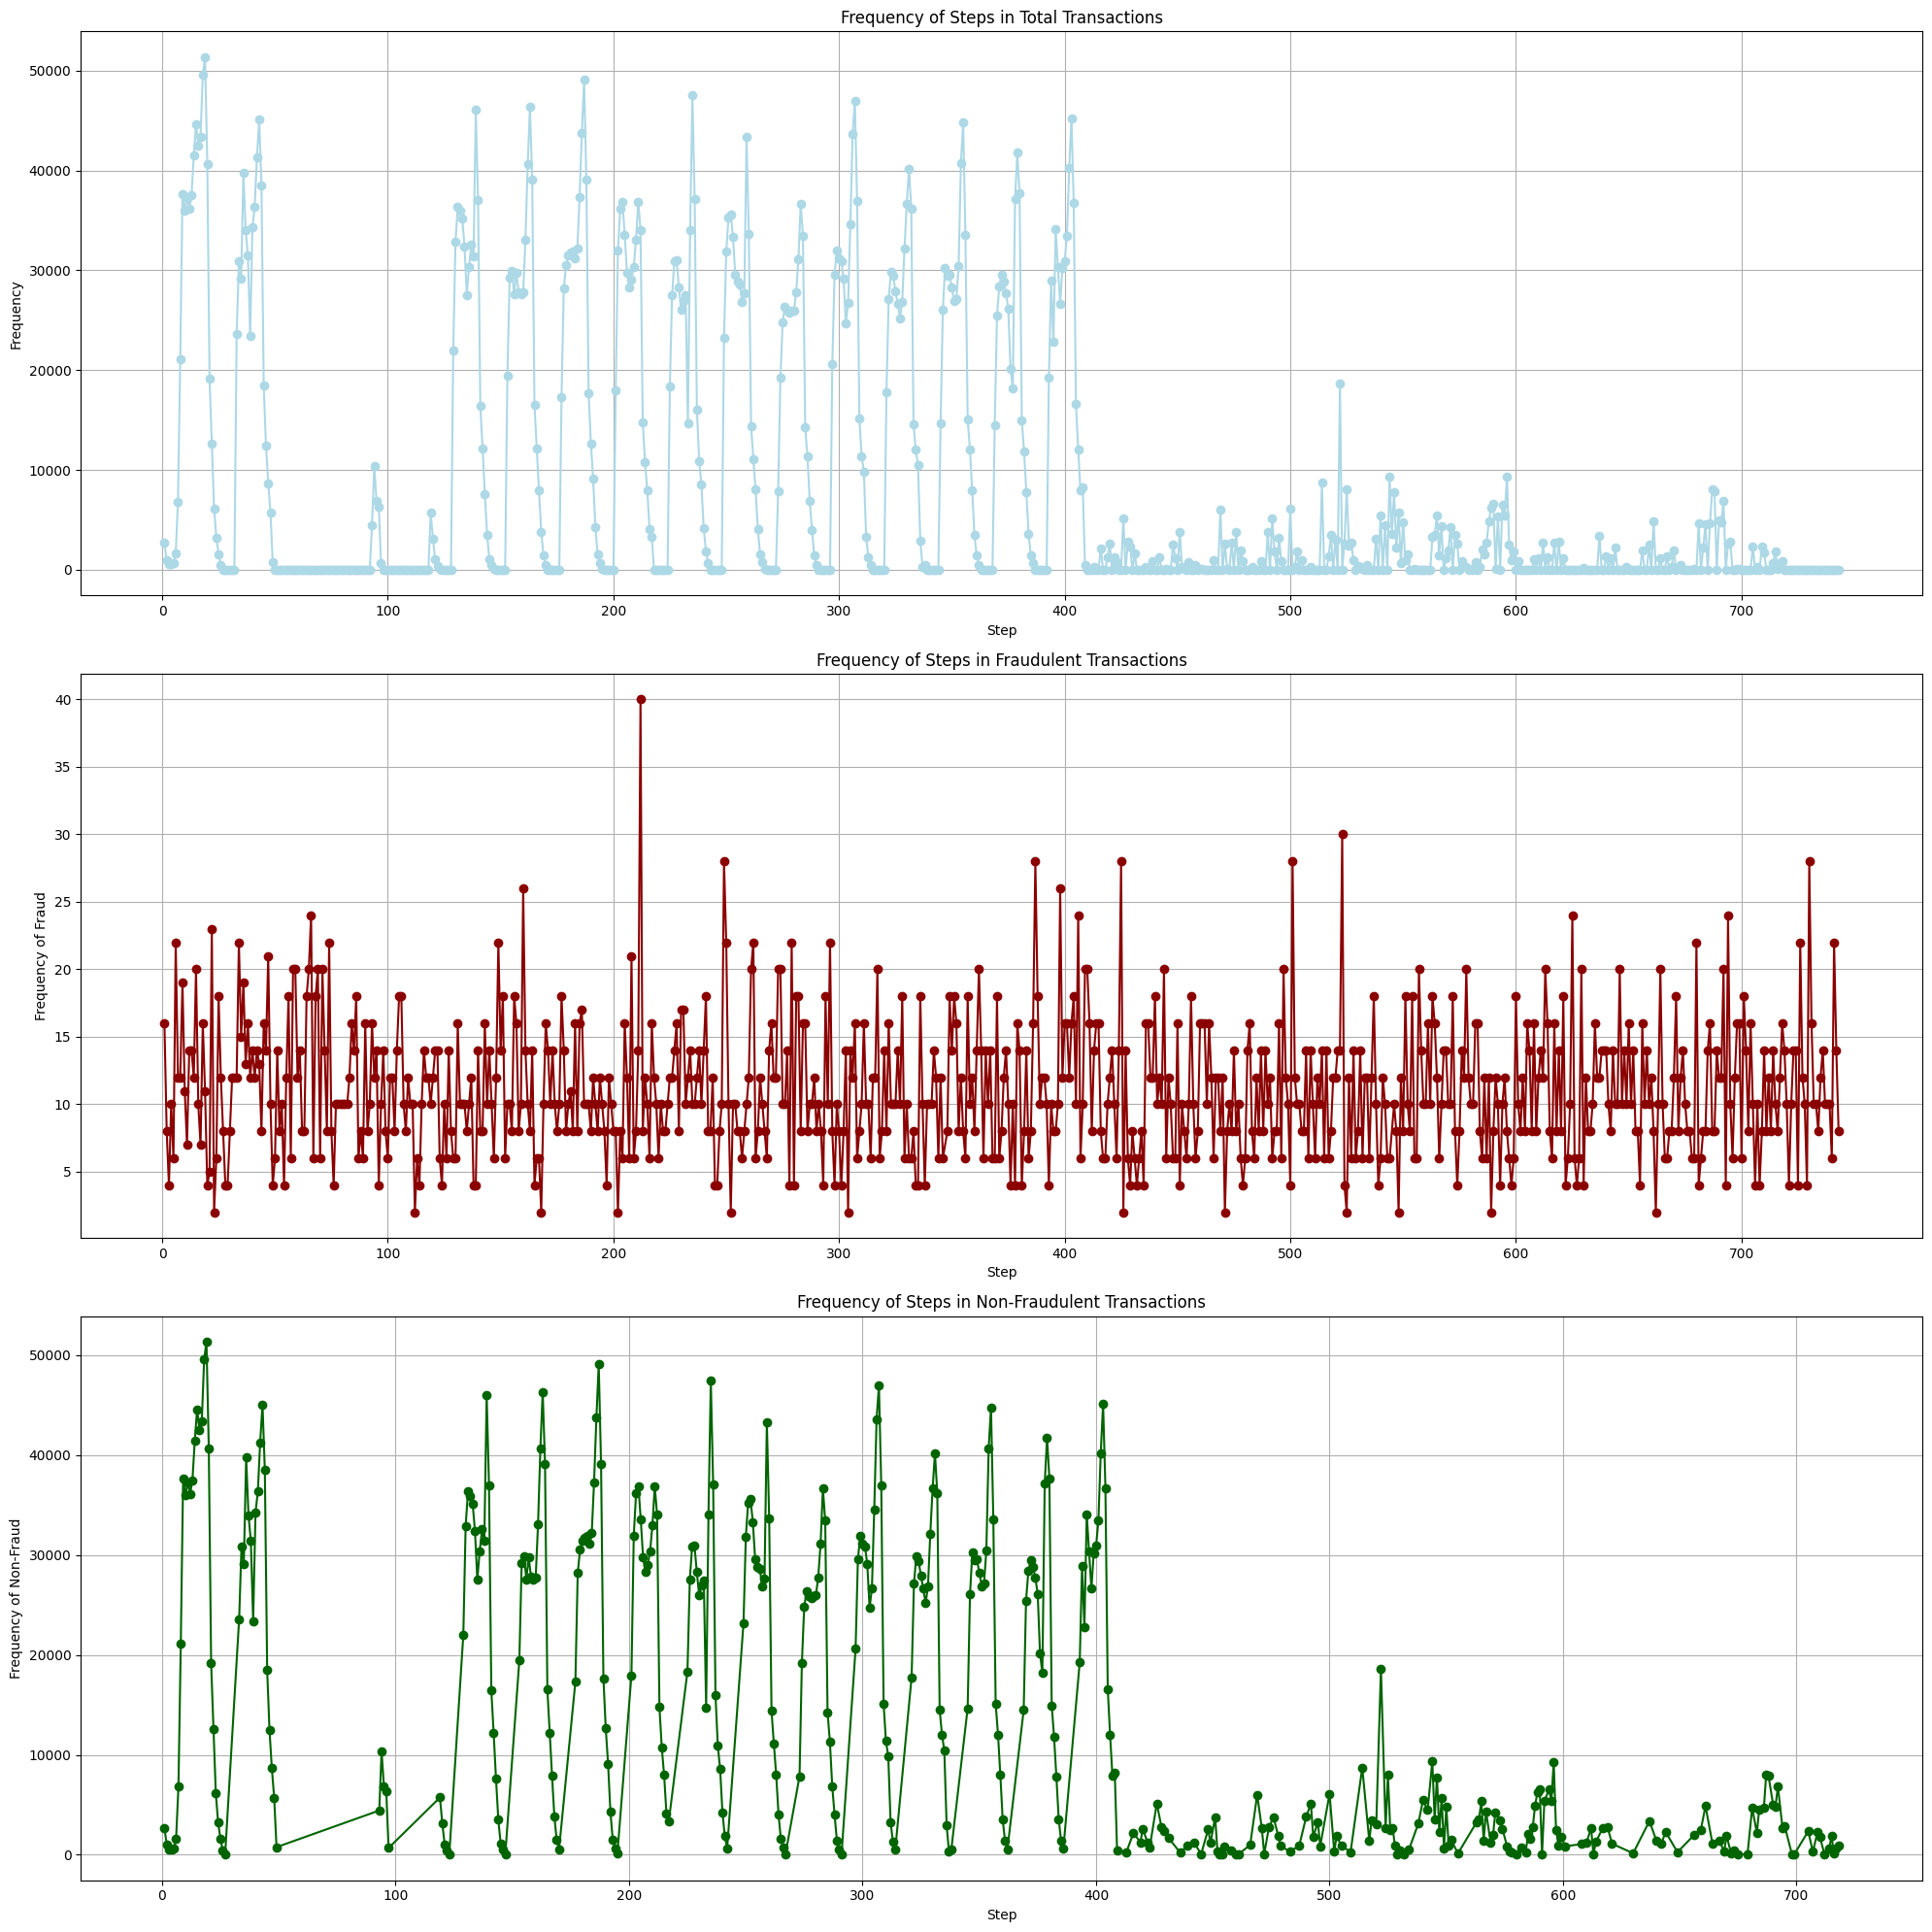

In [18]:
total_value_counts = df['step'].value_counts().sort_index()

fraud_df = df[df['isFraud'] == 1]
fraud_value_counts = fraud_df['step'].value_counts().sort_index()

non_fraud_df = df[df['isFraud'] == 0]
non_fraud_value_counts = non_fraud_df['step'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

# Gráfico total de transacciones
axes[0].plot(total_value_counts.index, total_value_counts, marker='o', linestyle='-', color='#add8e6')
axes[0].set_title("Frequency of Steps in Total Transactions")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Gráfico de transacciones fraudulentas
axes[1].plot(fraud_value_counts.index, fraud_value_counts, marker='o', linestyle='-', color='#8B0000')
axes[1].set_title("Frequency of Steps in Fraudulent Transactions")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Frequency of Fraud")
axes[1].grid(True)

# Gráfico de transacciones no fraudulentas
axes[2].plot(non_fraud_value_counts.index, non_fraud_value_counts, marker='o', linestyle='-', color='#006400')
axes[2].set_title("Frequency of Steps in Non-Fraudulent Transactions")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Frequency of Non-Fraud")
axes[2].grid(True)

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()

Observations:

Taking into consideration the fact that the dataset is very unbalanced we have to analyse these graphs with a grain of salt but there is a clear pattern that differentiates the behaviour between the fraudulent and the non-fraudulent transactions. 

Non-fraudulent transactions are mostly made in well defined step ranges and slow down when the step is > ~400. Fraudulent transactions stay constant along the step range.

A further analysis with more contextualized data could give us some insights about the importance of the steps in the process and the behaviour of fraudsters.

### Type

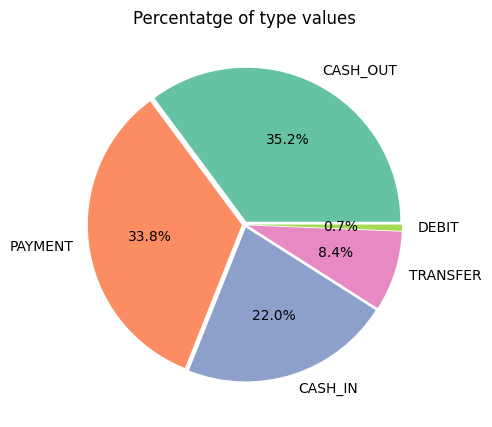

In [19]:
   
pie_plot(df['type'])

In [20]:
# Which are fraud among every category
fraud_types = df.groupby(['type', 'isFraud'], observed=False).size().reset_index(name='count')
total_transactions = fraud_types.groupby('type', observed = True)['count'].sum().reset_index(name='total')
count_data = fraud_types.merge(total_transactions, on='type')
count_data['fraud_rate(%)'] = (count_data['count'] / count_data['total'])*100
count_data.loc[count_data['isFraud'] == 1] 

,type,isFraud,count,total,fraud_rate(%)
2,CASH_OUT,1,4116,2237500,0.183955
6,TRANSFER,1,4097,532909,0.768799


Observations: 

The fraud percentatge related to each type is very low. We only have two types : CASH_OUT and TRANSFER with Fraud transactions. Those are two cases that could be investigated in order to find solutions for future security improvements.

### Amount

In [21]:
zero_amount_df = df.loc[df['amount'] == 0]
zero_amount_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


Observations:

Withrawals with amount = 0 are fraudulent. We could analyze the origin and destination users and see their behaviour. One example could be using the postal code or the IP to map and cluster them.

In [24]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000', '10000000-100000000']

df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_range
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1000-10000
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1000-10000
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-1000
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-1000
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,10000-100000


In [25]:

count_data = df.groupby(['amount_range', 'isFraud'], observed=True).size().reset_index(name='count')
total_transactions = count_data.groupby('amount_range', observed = True)['count'].sum().reset_index(name='total')
count_data = count_data.merge(total_transactions, on='amount_range')
fraud_transactions = count_data[count_data['isFraud'] == 1]
df_fraud = fraud_transactions.copy()
df_fraud['fraud_rate'] = (df_fraud['count'] / df_fraud['total'])*100
df_fraud

,amount_range,isFraud,count,total,fraud_rate
1,0-1000,1,58,142642,0.040661
3,1000-10000,1,220,1143361,0.019242
5,10000-100000,1,1429,2239253,0.063816
7,100000-1000000,1,3800,2706738,0.140390
9,1000000-10000000,1,2419,124976,1.935572
11,10000000-100000000,1,287,5650,5.079646


Observations: 

The biggest ranges have a higher fraud_rate
- 100000-1000000 = 0.14 %
- 1000000-10000000 = 1.93 %
- 10000000-100000000 = 5.07%

Fraud is more likely to happen with big amounts

In [53]:
subset_df = df.loc[(df['amount_range'] == '1000000-10000000') & (df['isFraud'] == 1)]
subset_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_range
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0,1000000-10000000
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0,1000000-10000000
3059,2,TRANSFER,1096187.24,C1093223281,1096187.24,0.0,C2063275841,0.00,0.00,1,0,1000000-10000000
3060,2,CASH_OUT,1096187.24,C77163673,1096187.24,0.0,C644345897,0.00,1096187.24,1,0,1000000-10000000
4442,4,TRANSFER,2930418.44,C2047521920,2930418.44,0.0,C449261773,0.00,0.00,1,0,1000000-10000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,0,1000000-10000000
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0,1000000-10000000
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,1000000-10000000
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,1000000-10000000


### Overview of the balances

In [27]:
df_balance = df[['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'isFraud', 'isFlaggedFraud']].copy()
df_balance = df_balance.loc[df_balance['type'] == 'TRANSFER']
df_balance.head(20)

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
58,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0,0
78,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0,0
79,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0,0
80,TRANSFER,17231.46,0.00,0.0,24672.00,0.00,0,0
81,TRANSFER,78766.03,0.00,0.0,103772.00,277515.05,0,0
82,TRANSFER,224606.64,0.00,0.0,354678.92,0.00,0,0
83,TRANSFER,125872.53,0.00,0.0,348512.00,3420103.09,0,0


#### Balances in the origin

In [28]:
subset_orig = df[['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'isFraud', 'isFlaggedFraud']].copy()
subset_orig['amount_moved'] = (subset_orig['oldbalanceOrig'] - subset_orig['newbalanceOrig']).round(2)
subset_orig = subset_orig.loc[subset_orig['amount'] != subset_orig['amount_moved']]
subset_orig

,type,amount,oldbalanceOrig,newbalanceOrig,isFraud,isFlaggedFraud,amount_moved
8,PAYMENT,4024.36,2671.00,0.00,0,0,2671.0
10,DEBIT,9644.94,4465.00,0.00,0,0,4465.0
13,PAYMENT,11633.76,10127.00,0.00,0,0,10127.0
15,CASH_OUT,229133.94,15325.00,0.00,0,0,15325.0
16,PAYMENT,1563.82,450.00,0.00,0,0,450.0
...,...,...,...,...,...,...,...
6362321,CASH_OUT,186273.84,168046.00,0.00,0,0,168046.0
6362322,TRANSFER,82096.45,13492.00,0.00,0,0,13492.0
6362460,TRANSFER,10000000.00,17316255.05,17316255.05,1,1,0.0
6362462,TRANSFER,7316255.05,17316255.05,17316255.05,1,1,0.0


Observations:

- How can a debit transaction can move more money than it is inside the bank account? 

#### Potential losses in origin

In [29]:
fraud_transactions = subset_orig[subset_orig['isFraud'] == 1]
fraud_transactions

,type,amount,oldbalanceOrig,newbalanceOrig,isFraud,isFlaggedFraud,amount_moved
724,CASH_OUT,416001.33,0.00,0.00,1,0,0.00
1911,CASH_OUT,132842.64,4499.08,0.00,1,0,4499.08
14861,CASH_OUT,181728.11,0.00,0.00,1,0,0.00
25875,TRANSFER,1078013.76,0.00,0.00,1,0,0.00
77745,CASH_OUT,277970.88,0.00,0.00,1,0,0.00
138559,TRANSFER,1933920.80,0.00,0.00,1,0,0.00
169998,CASH_OUT,149668.66,0.00,0.00,1,0,0.00
178668,CASH_OUT,222048.71,0.00,0.00,1,0,0.00
200845,CASH_OUT,454859.39,0.00,0.00,1,0,0.00
217978,TRANSFER,123194.95,79466.45,0.00,1,0,79466.45


Observations:

The fraudsters were aware of the account balance and transferred the whole amount maybe? I don't understand how they could have done it but it's an interesting behaviour that could be further investigated

#### Balances in the destination

In [30]:
subset_dest = df[['type', 'amount', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].copy()
subset_dest['amount_moved'] = (subset_dest['newbalanceDest'] - subset_dest['oldbalanceDest']).round(2)
subset_dest = subset_dest.loc[subset_dest['amount'] != subset_dest['amount_moved']]
subset_dest

,type,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_moved
0,PAYMENT,9839.64,0.00,0.00,0,0,0.00
1,PAYMENT,1864.28,0.00,0.00,0,0,0.00
2,TRANSFER,181.00,0.00,0.00,1,0,0.00
3,CASH_OUT,181.00,21182.00,0.00,1,0,-21182.00
4,PAYMENT,11668.14,0.00,0.00,0,0,0.00
...,...,...,...,...,...,...,...
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,1,0,1258818.83
6362614,TRANSFER,339682.13,0.00,0.00,1,0,0.00
6362616,TRANSFER,6311409.28,0.00,0.00,1,0,0.00
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,1,0,6311409.27


#### Potential losses in the destination

In [31]:
fraud_transactions = subset_dest[subset_dest['isFraud'] == 1]
fraud_transactions

,type,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_moved
2,TRANSFER,181.00,0.00,0.00,1,0,0.00
3,CASH_OUT,181.00,21182.00,0.00,1,0,-21182.00
251,TRANSFER,2806.00,0.00,0.00,1,0,0.00
252,CASH_OUT,2806.00,26202.00,0.00,1,0,-26202.00
680,TRANSFER,20128.00,0.00,0.00,1,0,0.00
...,...,...,...,...,...,...,...
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,1,0,1258818.83
6362614,TRANSFER,339682.13,0.00,0.00,1,0,0.00
6362616,TRANSFER,6311409.28,0.00,0.00,1,0,0.00
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,1,0,6311409.27


Observations:

Further investigation can be done here. Amounts don't match and there can be some patterns hidden related to user. Other features I would consider important are features related to location and transaction time

In [40]:
count_df = df.groupby(['amount_range', 'isFraud'], observed = False).size().reset_index(name='count')
total_counts = count_df.groupby('amount_range', observed = False)['count'].transform('sum')
count_df['percentage'] = (count_df['count'] / total_counts) * 100

count_df


,amount_range,isFraud,count,percentage
0,0-1000,0,142584,99.959339
1,0-1000,1,58,0.040661
2,1000-10000,0,1143141,99.980758
3,1000-10000,1,220,0.019242
4,10000-100000,0,2237824,99.936184
5,10000-100000,1,1429,0.063816
6,100000-1000000,0,2702938,99.859610
7,100000-1000000,1,3800,0.140390
8,1000000-10000000,0,122557,98.064428
9,1000000-10000000,1,2419,1.935572


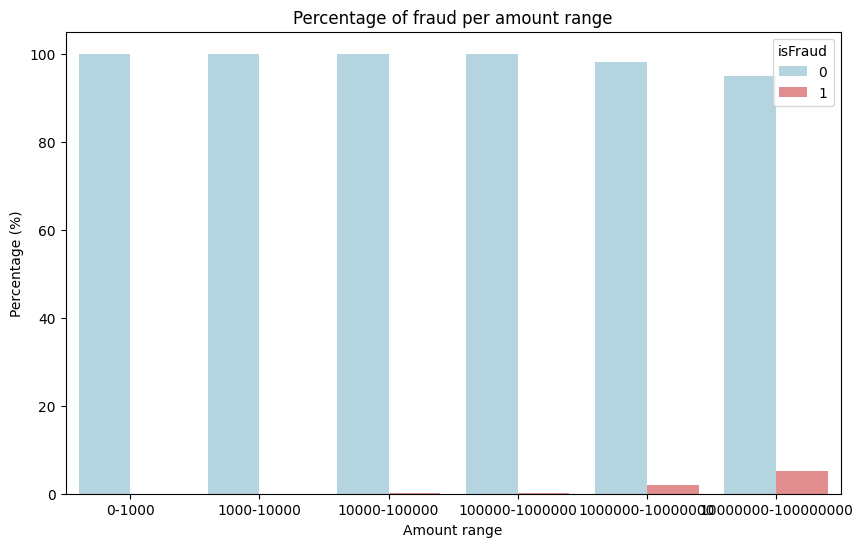

In [49]:
palette_colors = {0: 'lightblue', 1: 'lightcoral'}

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=count_df, x='amount_range', y='percentage', hue='isFraud', palette=palette_colors)

# Títulos y etiquetas
plt.title('Percentage of fraud per amount range')
plt.xlabel('Amount range')
plt.ylabel('Percentage (%)')


plt.show()

### nameOrig

In [57]:
print('The amount of total users is:')
df['nameOrig'].value_counts().sum()

The amount of total users is:


6362620

In [55]:
unique_names = df['nameOrig'].unique()
total_origin = df['nameOrig'].value_counts().sum()
print(f'total unique origin names: {total_origin - len(unique_names)}')
print(unique_names)

total unique origin names: 9313
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


In [63]:
name_orig_counts = df['nameOrig'].value_counts().reset_index()
name_orig_counts.columns = ['nameOrig', 'Count']
name_orig_counts
filtered_name_orig = name_orig_counts[name_orig_counts['Count'] > 1]['nameOrig']

filtered_df = df[df['nameOrig'].isin(filtered_name_orig)]
fraud_df = filtered_df[filtered_df['isFraud'] == 1]
fraud_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_range
217321,13,CASH_OUT,6188514.81,C686187434,6188514.81,0.0,C1562904239,381607.21,6424681.56,1,0,1000000-10000000
646015,35,CASH_OUT,171788.82,C432562518,171788.82,0.0,C1529736160,19962.00,0.00,1,0,100000-1000000
788647,39,TRANSFER,152042.16,C1118399210,152042.16,0.0,C104038589,0.00,0.00,1,0,100000-1000000
1059491,98,CASH_OUT,63624.08,C431038121,63624.08,0.0,C1925188324,0.00,63624.08,1,0,10000-100000
1496506,142,TRANSFER,346374.54,C171834973,346374.54,0.0,C1249377837,0.00,0.00,1,0,100000-1000000
2197236,185,CASH_OUT,164213.17,C803411135,164213.17,0.0,C1325722809,1681702.11,1845915.27,1,0,100000-1000000
2516796,205,TRANSFER,566156.42,C1498185758,566156.42,0.0,C1639518321,0.00,0.00,1,0,100000-1000000
2531840,205,TRANSFER,216179.15,C1863683348,216179.15,0.0,C1011918912,0.00,0.00,1,0,100000-1000000
3193184,243,CASH_OUT,1290193.08,C876181265,1290193.08,0.0,C24324787,0.00,1290193.08,1,0,1000000-10000000
3610975,269,TRANSFER,676882.33,C1627918307,676882.33,0.0,C1636966593,0.00,0.00,1,0,100000-1000000


Observations:

 location, postal code or any other feature that would allow us to cluster them

### nameDest

In [ ]:
df['nameDest'].value_counts().sum()

In [ ]:
duplicated_dest = df.loc[df.duplicated(subset = ['nameDest'])].reset_index()

In [ ]:
name_dest_counts = df['nameDest'].value_counts().reset_index()
name_dest_counts.columns = ['nameDest', 'Count']
name_dest_counts
filtered_name_dests = name_dest_counts[name_dest_counts['Count'] > 1]['nameDest']

filtered_df = df[df['nameDest'].isin(filtered_name_dests)]
filtered_df

In [ ]:
fraud_df = filtered_df[filtered_df['isFraud'] == 1]
fraud_df

In [ ]:
filtered_df.query('nameDest == "C1851065642"')

Observations: 

Repeated nameDest, frequently used accounts are not fraud

### Viz Amount - Fraud

In [ ]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000]
labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000']

# Crear una nueva columna con las etiquetas de los rangos
df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)
df

In [ ]:
count_data = df.groupby(['amount_range', 'isFraud']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='amount_range', y='count', hue='isFraud')

plt.title('Cantidad de valores por rango de monto dividido por isFraud')
plt.xlabel('Rango de monto')
plt.ylabel('Cantidad')
plt.legend(title='isFraud', loc='upper right')

plt.show()


### Outliers

In [ ]:

num_cols = 2
num_rows = (len(numeric_cols) + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 5))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Valores', fontsize=12)


plt.tight_layout()
plt.show()